# Sales Data Exploration and Regression

In [1]:
### Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools
import numpy as np

In [2]:
## Load the data
df_sales = pd.read_csv()

In [3]:
df_sales.drop(columns=['Unnamed: 0'],inplace=True) ## remove the unnecessary column
df_sales.head(1)

,area1_sales,area2_sales,area3_sales,total_sales
0,0.79,0.8,0.02,1.75


In [4]:
df_sales.describe()

,area1_sales,area2_sales,area3_sales,total_sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.455067,0.115893,0.085187,0.909147
std,0.296090,0.251816,0.091396,0.344035
min,0.000000,0.000000,0.000000,0.490000
25%,0.260000,0.000000,0.040000,0.610000
50%,0.420000,0.000000,0.070000,0.810000
75%,0.610000,0.080000,0.110000,1.150000
max,1.690000,1.710000,1.230000,1.750000


## Data Exploration

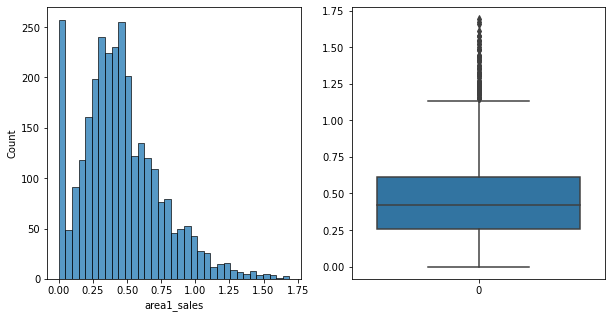

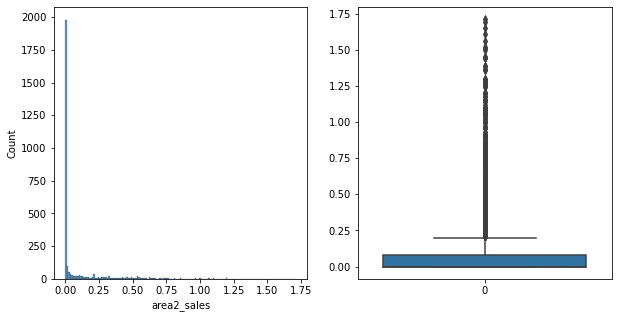

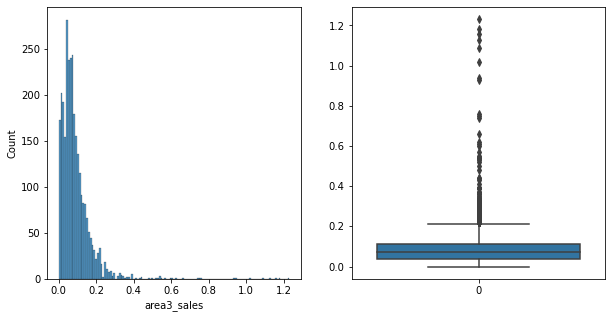

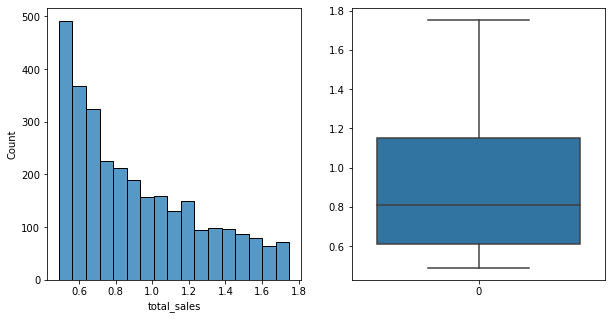

In [5]:
for i in df_sales.columns:    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # create a histogram
    sns.histplot(data=df_sales[i], ax=ax1)
    # create a boxplot
    sns.boxplot(data=df_sales[i], ax=ax2)
    plt.show()


Note: From the univariate analysis we can see that all the variables have significant outliers
1. Area_1_sales is much better in terms of distribution and outliers than other two area sales
2. Area_2_sales has mostly zero sales

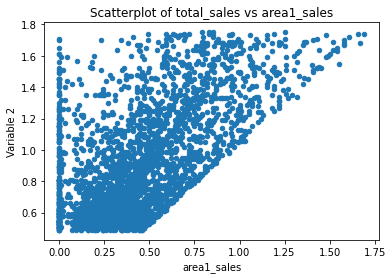

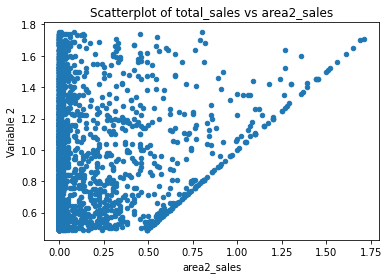

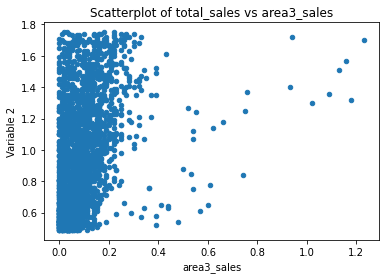

In [6]:
for i in df_sales.columns[:3]:
    df_sales.plot(kind='scatter', x=i, y='total_sales', title='Scatterplot of total_sales vs {}'.format(i))
    plt.xlabel(i)
    plt.ylabel('Variable 2')
    plt.show()

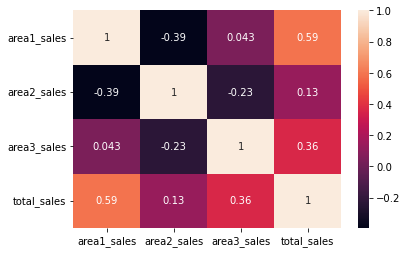

In [7]:
# create a correlation matrix
corr_matrix = df_sales.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

# show the heatmap
plt.show()

From the bivariate sales: we could see there is no proper correlation between area sales and the total sales.
Although area1_sales is slight better in correlation

### Interaction Effect

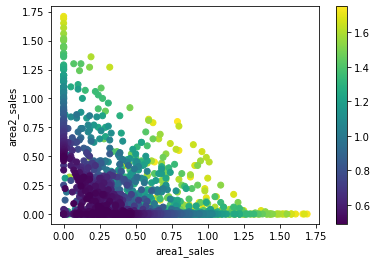

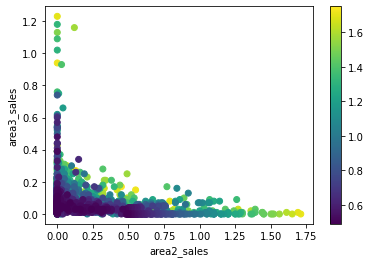

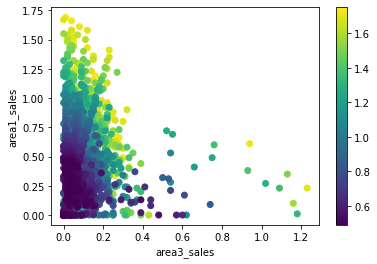

In [8]:
for x,y in zip(['area1_sales','area2_sales','area3_sales'],['area2_sales','area3_sales','area1_sales']):
    if x!=y:
        plt.scatter(df_sales[x], df_sales[y], c=df_sales['total_sales'])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.colorbar()
        plt.show()

From the visualization there seems to be an interaction effect between the indepedent variables to have effect on the total sales

In [9]:
# specify the regression model with interaction terms
sales_model = smf.ols(formula='total_sales ~ area1_sales + area2_sales + area3_sales', data=df_sales)

# fit the model
results = sales_model.fit()

# print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2354.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:56:08   Log-Likelihood:                 761.25
No. Observations:                3000   AIC:                            -1515.
Df Residuals:                    2996   BIC:                            -1490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2601      0.008     30.743      

In [10]:
print(results.pvalues)

Intercept      1.227049e-180
area1_sales     0.000000e+00
area2_sales     0.000000e+00
area3_sales     0.000000e+00
dtype: float64


### Notes:
1. As the model p-value less than the significance value (0.05) (i.e. F-stat > Critical F) the model is significant
2. All the indepedent variables are also signficant

#### Interaction model

In [11]:
# specify the regression model with interaction terms
sales_model_int = smf.ols(formula='total_sales ~ area1_sales * area2_sales * area3_sales', data=df_sales)

# fit the model
results_int = sales_model_int.fit()

# print the summary of the model
print(results_int.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:56:08   Log-Likelihood:                 830.59
No. Observations:                3000   AIC:                            -1645.
Df Residuals:                    2992   BIC:                            -1597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [12]:
results_int.pvalues

Intercept                              2.650228e-194
area1_sales                            5.235193e-311
area2_sales                            1.535022e-204
area1_sales:area2_sales                 2.871530e-02
area3_sales                             2.031511e-79
area1_sales:area3_sales                 5.746221e-14
area2_sales:area3_sales                 6.632218e-01
area1_sales:area2_sales:area3_sales     2.839585e-04
dtype: float64

### Interaction Regression Notes:
1. As the model p-value less than the significance value (0.05) (i.e. F-stat > Critical F) the model is significant
2. All the indepedent variables are also signficant except the interaction term between the area2 sales and area3 sales
3. As the AIC and BIC of the interaction model less than the normal model tells us that the interaction terms had significant effect on the model. The increased adjusted r-square suggests the same

### Regression without insignificant interaction

In [13]:
# specify the regression model with interaction terms
sales_model_int_2 = smf.ols(formula='total_sales ~ area1_sales * area2_sales * area3_sales - (area2_sales:area3_sales)', data=df_sales)

# fit the model
results_int_2 = sales_model_int_2.fit()

# print the summary of the model
print(results_int_2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:56:08   Log-Likelihood:                 830.50
No. Observations:                3000   AIC:                            -1647.
Df Residuals:                    2993   BIC:                            -1605.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Notes
1. Although there is no significant increase in the Adjusted R-square, AIC and BIC got decreased
2. Keeping in mind the principle of parsinomy we can use the sales2_model_2 as the final model``

#### Plotting Residuals Against Model Predictions to check for violations of the assumptions

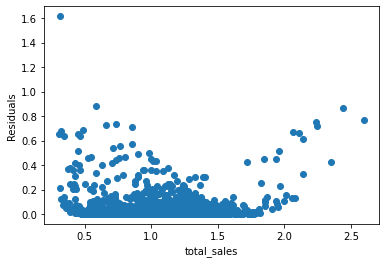

In [14]:
# create a scatter plot of the residuals vs the dependent variable
plt.scatter(results_int_2.predict(), results_int_2.resid ** 2)
plt.xlabel('total_sales')
plt.ylabel('Residuals')
plt.show()

There is no systematic pattern. We can assume no violations of the regression assumptions

# Logistic Regression

In [15]:
## Load the data
df_customer = pd.read_csv(r"D:\Vamsee\Vamsee\UC_Davis\Classes\Winter_term\Machine_Learning\Assignments\assignment_2\customer.csv")

In [16]:
df_customer.head(1)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0


In [17]:
df_customer.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Data Exploration

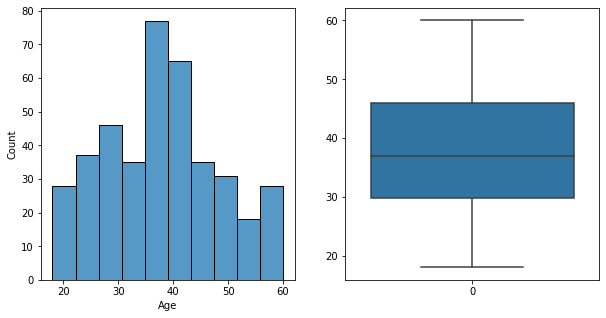

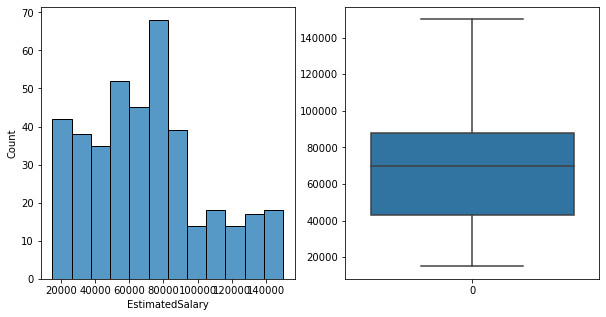

In [18]:
for i in ['Age','EstimatedSalary']:    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # create a histogram
    sns.histplot(data=df_customer[i], ax=ax1)
    # create a boxplot
    sns.boxplot(data=df_customer[i], ax=ax2)
    plt.show()

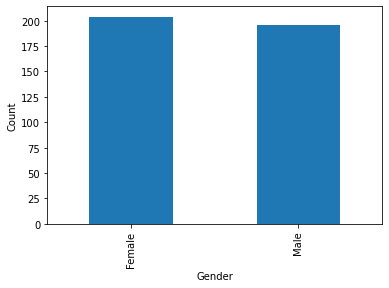

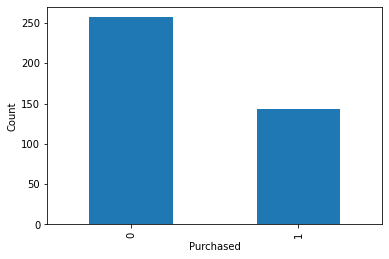

In [19]:
# create a bar chart
for i in ['Gender','Purchased']:
    df_customer[i].value_counts().sort_index().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

#### Notes:
1. The data is imbalanced with who not purchased is more than the purchased sample
2. There are no outliers in the numerical independent variables

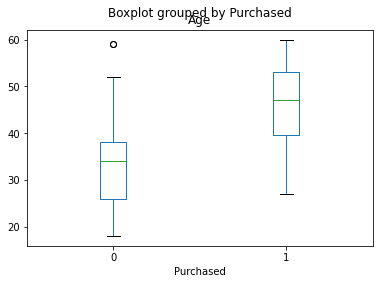

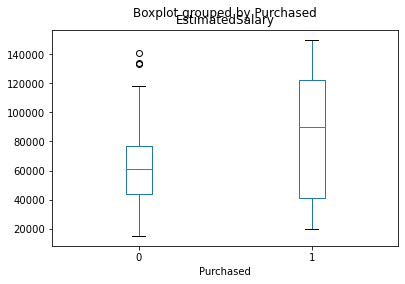

In [20]:
# create a box plot
for i in ['Age','EstimatedSalary']:    
    df_customer.boxplot(column=i, by='Purchased', grid=False)
    plt.show()

The purchased was done by users with higher salary and older users

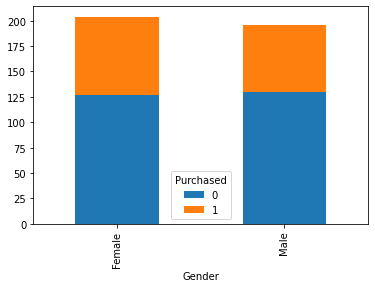

In [21]:
df_customer.groupby(['Gender', 'Purchased']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

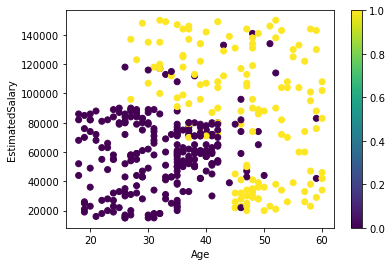

In [22]:
plt.scatter(df_customer['Age'], df_customer['EstimatedSalary'], c=df_customer['Purchased'])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.colorbar()
plt.show()

As we can see there is high correlation between who purchased are with older and high salary users

In [23]:
print(df_customer['Age'].corr(df_customer['EstimatedSalary']))

0.1552380179721003


In [24]:
df_customer = pd.concat([df_customer, pd.get_dummies(df_customer['Gender'], drop_first=True)], axis=1)

In [25]:
df_customer.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
Male                uint8
dtype: object

## Logistic Regression

In [26]:
# specify the independent and dependent variables
x = df_customer[['Age', 'EstimatedSalary', 'Male']]
y = df_customer['Purchased']
x=sm.add_constant(x)
# fit a logistic regression model
logit = sm.Logit(y, x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


In [27]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.4711
Time:                        18:56:11   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Age                 0.2370      0.026      8.984      0.000       0.185       0.289
EstimatedSalary  3.644e-05   5.4

### Logistic Regression Model Notes:
1. The model is significant with the p-value less than any significance value
2. Except the gender dummy every other variable in significant in prediction 

Since the Gender Dummy isn't significant we can trim the model by removing the Gender Dummy

In [28]:
# specify the independent and dependent variables
x_trim = df_customer[['Age', 'EstimatedSalary']]
y_trim = df_customer['Purchased']
x_trim=sm.add_constant(x_trim)
# fit a logistic regression model
logit_trim = sm.Logit(y_trim, x_trim)
result_trim = logit_trim.fit()

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8


In [29]:
print(result_trim.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.4688
Time:                        18:56:11   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 7.995e-54
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.4340      1.300     -9.566      0.000     -14.982      -9.886
Age                 0.2335      0.026      9.013      0.000       0.183       0.284
EstimatedSalary   3.59e-05   5.4

## All the feature combinations

In [30]:
dependent_columns = ['Male','Age','EstimatedSalary']

# create a list to store the results
model_results = {}

# loop through all possible combinations of the features
for i in range(1, len(dependent_columns)+1):
    for comb in itertools.combinations(dependent_columns, i):
        # specify the independent and dependent variables
        comb_list = list(comb)
        x = df_customer[list(comb)]
        x = sm.add_constant(x)
        comb_list.append('Constant')
        y = df_customer['Purchased']
        # fit the logistic regression model
        model_all = sm.Logit(y, x)
        result_all = model_all.fit()
        # append the pseudo R-squared, AIC, and BIC to the results list
        model_results['-'.join(comb_list)] = [result_all.prsquared, result.aic, result.bic]

Optimization terminated successfully.
         Current function value: 0.651064
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.420327
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.584658
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.420177
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.584449
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


In [31]:
pd.DataFrame.from_dict(model_results, orient='index',columns=['psuedo_rsquared','aic','bic'])

,psuedo_rsquared,aic,bic
Male-Constant,0.001384,283.843225,299.809084
Age-Constant,0.355294,283.843225,299.809084
EstimatedSalary-Constant,0.103239,283.843225,299.809084
Male-Age-Constant,0.355524,283.843225,299.809084
Male-EstimatedSalary-Constant,0.103560,283.843225,299.809084
Age-EstimatedSalary-Constant,0.468816,283.843225,299.809084
Male-Age-EstimatedSalary-Constant,0.471132,283.843225,299.809084


## Notes
1. Although the psuedo_rsquared of (Male,Age,Estimated) model is better than the (Age-EstimatedSalary) model but the variable isn't significant
2. The same thing was shown as AIC, BIC and the visualization of gender and purchased suggests the same

### Based on the in-sample rsquare the best model is with which has the all the values

## Regarding the coefficients:
For the constant term (-12.7836), the odds ratio would be e^(-12.7836) = 2.85e-06, indicating a very low probability of the user purchase when all other variables are held at 0.

For the variable Age (0.2370), the odds ratio would be e^(0.2370) = 1.26, which means that for a one year increase in Age, the odds of the user purchase increase by 26%, holding all other variables constant.

For the variable EstimatedSalary (3.644e-05), the odds ratio would be e^(3.644e-05) = 1.00003649, which means that for a one dollar increase in EstimatedSalary, the odds of the user purchase increase by 0.03649%, holding all other variables constant.

For the variable Male (0.3338), the odds ratio would be e^(0.3338) = 1.39, which means that the user being Male,a 39% more chance that the user purchase compared to female, holding all other variables constants

## Accuracy may not be the best way to measure the performance of this model.
1. Since its highly imbalanced sample as show in earlier visualization
2. We didn't measure the performance on the model not seen data (out of sample data)
3. We don't know what's the cost associated to a user labelled as purchased, we might incur unnecessary marketing costs on the user. (i.e. In the case of false positives)

In these cases, it would be better to look at metrics such as precision, recall, and F1-score, which give a better sense of how well the model is able to identify the positive class.

### Interaction plots with model outputs

In [32]:
# specify the independent and dependent variables
# Including the EstimatedSalary to avoid any unnecessary overfit to the Gender and Age 
df_customer["male_age"] = df_customer['Male']*df_customer['Age']
x = df_customer[['Age', 'EstimatedSalary', 'Male','male_age']]
y = df_customer['Purchased']
x=sm.add_constant(x)
# fit a logistic regression model
logit = sm.Logit(y, x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.343920
         Iterations 8


In [33]:
##Result When Included Interaction terms
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.4725
Time:                        18:56:11   Log-Likelihood:                -137.57
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.811e-52
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.1293      1.525     -7.951      0.000     -15.119      -9.140
Age                 0.2210      0.031      7.017      0.000       0.159       0.283
EstimatedSalary  3.647e-05   5.4

In [34]:
df_customer['Age'].max()

60

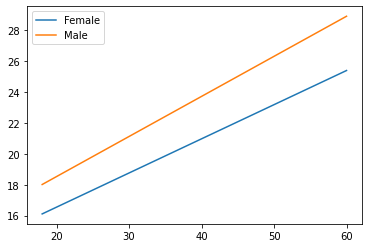

In [35]:
x = np.linspace(18, 60,42)

plt.plot(x, 0.2210*x +12.1293, linestyle='solid')
plt.plot(x, 0.2593*x +13.3432, linestyle='solid')
plt.legend(["Female", "Male"]);

##### From the above plot and the interaction p-value, we could state that there is no interaction between Age and Gender

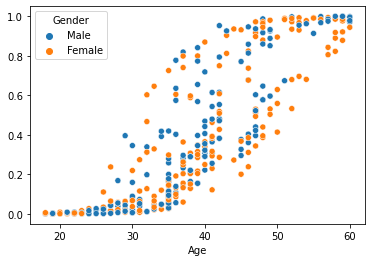

In [36]:
sns.scatterplot(x=df_customer['Age'], y=result.predict(), hue=df_customer['Gender'])
plt.show()

In [37]:
prediction_result = []
for i in result.predict():
    if i >= 0.5:
        prediction_result.append(1)
    else:
        prediction_result.append(0)

In [38]:
df_customer['prediction_purchased'] = prediction_result

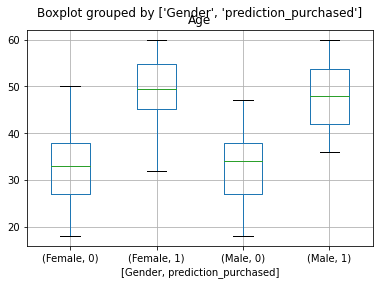

In [39]:
df_customer.boxplot(column='Age', by=['Gender', 'prediction_purchased'])
plt.show()

### There is not a significant difference Interaction effect on the purchase

### Question-6

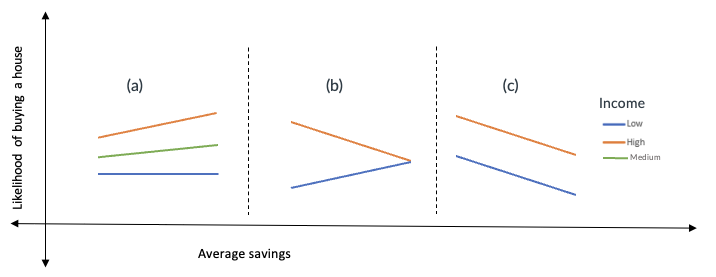

In [40]:
from IPython.display import Image
Image(filename=r'C:\Users\vamsi\Downloads\interactionPlot.png')

For plot (a):
1. The regression equation may include the interaction term between the income and savings to predict the likelohood of buying a house
2. As we can see, while the high and medium income  have the positive intercept but the low income has slightly different slope i.e. negative slope with respective to average savings



For plot (b):
1. The regression equation should include the interaction term between the income and savings to predict the likelohood of buying a house 
2. There is clearly different intercepts between the high and low incomes, former with negative intercept but the later with the positive intercept or coefficient with respective to average savings. Low savings, low income people are less likely to buy than the low savings, high income people

For plot (c):
1. The regression equation shouldn't include the interaction term between the income and savings to predict the likelohood of buying a house 
2. The slope i.e. likelihood for both the low and high income people changing the similar way with resective to savings 